In [1]:
import numpy as np

import sympy as sym

import itertools

In [48]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "../src/main.py").load_module()

from main import *

In [3]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import matplotlib.colors as colors

In [5]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

## The case of two bits strategies

To test the formulation we compare the following payoffs.

In [ ]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])

    two_bit_M = transition_matrix(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2], bits=4)

    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M)

    assert np.isclose(
        ss_one_bit @ np.array([b - c, -c, b, 0]), ss_two_bit @ payoffs_vector(c, b)
    )

**Cooperation**

In [ ]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])

    two_bit_M = transition_matrix(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2], bits=4)

    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M)

    assert np.isclose(
        cooperation_rate(ss_one_bit, size=4), cooperation_rate(ss_two_bit, size=16)
    )

## The case of two bits strategies

In [ ]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, p3, p4, q1, q2, q3, q4 = np.random.random(8)

    two_bit_M = transition_matrix(p=[p1, p2, p3, p4], q=[q1, q2, q3, q4], bits=4)

    three_bit_M = transition_matrix(
        p=[p1, p2, p3, p4, p1, p2, p3, p4], q=[q1, q2, q3, q4, q1, q2, q3, q4], bits=8
    )

    ss_two_bit = invariant_distribution(two_bit_M)
    ss_three_bit = invariant_distribution(three_bit_M)

    assert np.isclose(
        ss_two_bit @ payoffs_vector(c, b), ss_three_bit @ payoffs_vector(c, b, dim=16)
    )

In [ ]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    two_bit_M = transition_matrix(p=[p1, p2, p3, p4], q=[q1, q2, q3, q4], bits=4)

    three_bit_M = transition_matrix(
        p=[p1, p2, p3, p4, p1, p2, p3, p4], q=[q1, q2, q3, q4, q1, q2, q3, q4], bits=8
    )

    ss_two_bit = invariant_distribution(two_bit_M)
    ss_three_bit = invariant_distribution(three_bit_M)

    assert np.isclose(
        cooperation_rate(ss_two_bit, size=16), cooperation_rate(ss_three_bit, size=64)
    )

## The case of four bits strategies

In [ ]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(100):
    p1, p2, p3, p4, p5, p6, p7, p8, q1, q2, q3, q4, q5, q6, q7, q8 = np.random.random(
        16
    )

    m_four_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8, p1, p2, p3, p4, p5, p6, p7, p8),
        (q1, q2, q3, q4, q5, q6, q7, q8, q1, q2, q3, q4, q5, q6, q7, q8),
        bits=16,
    )

    m_three_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8), (q1, q2, q3, q4, q5, q6, q7, q8), bits=8
    )

    ss_four = invariant_distribution(m_four_bits)
    ss_three = invariant_distribution(m_three_bits)

    assert np.isclose(
        ss_four @ payoffs_vector(c, b, dim=64), ss_three @ payoffs_vector(c, b, dim=16)
    )

In [ ]:
(16 ** 2) / 4

In [ ]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(100):
    p1, p2, p3, p4, p5, p6, p7, p8, q1, q2, q3, q4, q5, q6, q7, q8 = np.random.random(
        16
    )

    m_four_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8, p1, p2, p3, p4, p5, p6, p7, p8),
        (q1, q2, q3, q4, q5, q6, q7, q8, q1, q2, q3, q4, q5, q6, q7, q8),
        bits=16,
    )

    m_three_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8), (q1, q2, q3, q4, q5, q6, q7, q8), bits=8
    )

    ss_four = invariant_distribution(m_four_bits)
    ss_three = invariant_distribution(m_three_bits)

    assert np.isclose(
        cooperation_rate(ss_three, size=64), cooperation_rate(ss_four, size=256)
    )

**Checks for matlab code**

**The two bits case**

In [ ]:
np.random.seed(100)
p1, p2 = np.random.random(4), np.random.random(4)

In [ ]:
p1, p2

In [ ]:
M = transition_matrix(p1, p2, bits=4)

ss = invariant_distribution(M)

In [ ]:
ss

In [ ]:
c = 0.1

In [ ]:
b = 1

In [ ]:
ss @ payoffs_vector(c, b)

In [ ]:
cooperation_rate(ss, size=4 ** 2)

**The three bits case**

In [ ]:
np.random.seed(200)
sdim = 8

p1, p2 = np.random.random(sdim), np.random.random(sdim)

In [ ]:
p1, p2

In [ ]:
M = transition_matrix(p1, p2, bits=8)

ss = invariant_distribution(M)

In [ ]:
c, b = 0.1, 1

In [ ]:
ss @ payoffs_vector(c, b, dim=16)

In [ ]:
cooperation_rate(ss, sdim ** 2)

**The four bits case**

In [ ]:
np.random.seed(300)
bits = 16

p1, p2 = np.random.random(bits), np.random.random(bits)

In [ ]:
p1, p2

In [ ]:
M = transition_matrix(p1, p2, bits=bits)

ss = invariant_distribution(M)

In [ ]:
ss @ payoffs_vector(c, b, dim=64)

In [ ]:
cooperation_rate(ss, bits ** 2)

## Evolutionary simulations

In [ ]:
import pandas as pd

In [ ]:
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [ ]:
names1 = [f"p_{i}" for i in range(1, 3)] + ["t", "cooperation"]
names2 = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]
names3 = [f"p_{i}" for i in range(1, 9)] + ["t", "cooperation"]
names4 = [f"p_{i}" for i in range(1, 17)] + ["t", "cooperation"]

dfs1 = [
    [pd.read_csv(f"matlab_data/bits_2_beta_0.1_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"matlab_data/bits_4_beta_0.1_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"matlab_data/bits_8_beta_0.1_seed_1_c_{c}.csv", names=names3) for c in cs],
]

dfs2 = [
    [pd.read_csv(f"matlab_data/bits_2_beta_1_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"matlab_data/bits_4_beta_1_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"matlab_data/bits_8_beta_1_seed_1_c_{c}.csv", names=names3) for c in cs],
]

dfs3 = [
    [pd.read_csv(f"matlab_data/bits_2_beta_10_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"matlab_data/bits_4_beta_10_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"matlab_data/bits_8_beta_10_seed_1_c_{c}.csv", names=names3) for c in cs],
]

In [ ]:
dfs1 = [[df.drop_duplicates() for df in dfs] for dfs in dfs1]
dfs2 = [[df.drop_duplicates() for df in dfs] for dfs in dfs2]
dfs3 = [[df.drop_duplicates() for df in dfs] for dfs in dfs3]

In [ ]:
def frequencies(dfs, max_steps=10 ** 7):

    for df in dfs:
        frequencies = []
        previous = 0
        for value in df["t"][1:]:
            frequencies.append(value - previous)
            previous = value
        frequencies.append(max_steps - previous)

        df["frequencies"] = np.array(frequencies)
        df["frequencies norm"] = np.array(frequencies) / max_steps

    return dfs

In [ ]:
df_beta_pnt = [frequencies(dfs) for dfs in dfs1[:-1]] + [frequencies(dfs1[-1], (2 * 10 ** 7))]
df_beta_one = [frequencies(dfs) for dfs in dfs2[:-1]] + [frequencies(dfs2[-1], (2 * 10 ** 7))]
df_beta_ten = [frequencies(dfs) for dfs in dfs3[:-1]] + [frequencies(dfs3[-1], (2 * 10 ** 7))]

In [ ]:
labels = [r"$\beta$=0.1", r"$\beta$=1", r"$\beta$=10"]

In [ ]:
df5 = [pd.read_csv(f"matlab_data/bits_16_beta_0.1_seed_1_c_{c}.csv", names=names4) for c in cs]
df5 = [df.drop_duplicates() for df in df5]
df5 = frequencies(df5, 10 ** 6)

sxt_bits_points = [sum(df["frequencies norm"] * df["cooperation"]) for df in df5]

In [ ]:
df5 = [pd.read_csv(f"matlab_data/bits_16_beta_1_seed_1_c_{c}.csv", names=names4) for c in cs]
df5 = [df.drop_duplicates() for df in df5]
df5 = frequencies(df5, 10 ** 6)

sxt_bits_one_points = [sum(df["frequencies norm"] * df["cooperation"]) for df in df5]

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3))

for i, gdfs in enumerate([df_beta_pnt, df_beta_one, df_beta_ten]):

    points = [
        [sum(df["frequencies norm"] * df["cooperation"]) for df in dfs] for dfs in gdfs
    ]

    axes[i].plot(np.linspace(0, 1, 11), points[0], "-o", label="1 bit")
    axes[i].plot(np.linspace(0, 1, 11), points[1], "--o", label="2 bit")
    axes[i].plot(np.linspace(0, 1, 11), points[2], "--o", label="3 bit")

    axes[i].set_ylim(0, 1.1)

    axes[i].set_yticks(np.arange(0, 2))

    axes[i].set_xlabel("c")

    axes[i].legend()
    axes[i].set_title(labels[i])

axes[0].set_ylabel("av. cooperation");

axes[0].plot(np.linspace(0, 1, 11), sxt_bits_points, "--o", label="4 bit");
axes[1].plot(np.linspace(0, 1, 11), sxt_bits_one_points, "--o", label="4 bit");

axes[0].legend();
axes[1].legend();

plt.savefig("static/average_cooperation_over_c_with_diff_selection_strength.pdf", bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3))

for i, gdfs in enumerate([df_beta_pnt, df_beta_one, df_beta_ten]):

    points = [
        [sum(df["frequencies norm"] * df["cooperation"]) for df in dfs] for dfs in gdfs
    ]
    
    ys1 =  np.array(points[1]) - np.array(points[0])
    
    ys2 =  np.array(points[2]) - np.array(points[1])
    
    axes[i].scatter(cs, ys1);
    
    axes[i].scatter(cs, ys2);
    
#     axes[i].legend();
    

In [ ]:
dfs = [
    pd.read_csv(f"data/matlab_one_bit_beta_1_seed_{seed}_c_0.3.csv", names=names2)
    for seed in range(1, 11)
]


df2s = [
    pd.read_csv(f"data/matlab_two_bits_beta_1_seed_{seed}_c_0.3.csv", names=names2)
    for seed in range(1, 11)
]

In [ ]:
df3s = [
    pd.read_csv(f"data/matlab_three_bits_beta_1_seed_{seed}_c_0.3.csv",
                names=names3)
    for seed in range(1, 11)
]

In [ ]:
dfs = [df.drop_duplicates() for df in dfs]

df2s = [df.drop_duplicates() for df in df2s]

df3s = [df.drop_duplicates() for df in df3s]

In [ ]:
dfs = frequencies(dfs)

df2s = frequencies(df2s)

df3s = frequencies(df3s)

In [ ]:
abundance = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
    )
    for df in dfs
]

In [ ]:
abundance2 = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["p_3"],
        df.iloc[df["frequencies"].idxmax()]["p_4"],
    )
    for df in df2s
]

In [ ]:
abundance3 = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["p_3"],
        df.iloc[df["frequencies"].idxmax()]["p_4"],
        df.iloc[df["frequencies"].idxmax()]["p_5"],
        df.iloc[df["frequencies"].idxmax()]["p_6"],
        df.iloc[df["frequencies"].idxmax()]["p_7"],
        df.iloc[df["frequencies"].idxmax()]["p_8"],
    )
    for df in df3s
]

**Sanity check cooperations**

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3.5))

heights = [[b[i] for b in abundance] for i in range(2)]

errors = [np.std(h) for h in heights]

for i in range(2):
    axes[0].bar(i + 1, np.mean(heights[i]), yerr=errors[i], color="C0")

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["C", "D"], rotation=45)
axes[0].set_title("One bit", fontweight="bold")

axes[0].set_ylabel("cooperation probability")

heights = [[b[i] for b in abundance2] for i in range(4)]
errors = [np.std(h) for h in heights]

for i in range(4):
    axes[1].bar(i + 1, np.mean(heights[i]), yerr=errors[i], color="C1")

axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(["CC", "CD", "DC", "DD"], rotation=45)
axes[1].set_title("Two bits", fontweight="bold")

heights = [[b[i] for b in abundance3] for i in range(8)]
errors = [np.std(h) for h in heights]

for i in range(8):
    axes[2].bar(i + 1, np.mean(heights[i]), yerr=errors[i], color="C2")

axes[2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
axes[2].set_xticklabels(["CCC", "CCD", "CDC", "CDD", "DCC", "DCD", "DDC", "DDD"], rotation=45)
axes[2].set_title("Three bits", fontweight="bold");

# axes[1].text(-0.9, -0.2, "$b=1$ & $c=0.3$", fontsize=12)

### Equilibria

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tqdm

In [17]:
import numpy as np

In [4]:
columns = ["ID", 'p1', 'p2', 'p3', 'p4', 'q1', 'q2', 'q3', 'q4',
           'label', 'Sp', 'Sq', "condition A", "condition B",'condition','c', 'b']

In [8]:
df = pd.read_csv("../checks/dimensions_4_number_of_trials_3_decimals_10000000.csv",
                names=columns)

In [9]:
df.head()

,ID,p1,p2,p3,p4,q1,q2,q3,q4,label,Sp,Sq,condition A,condition B,condition,c,b
0,0,1.0,0.72,0.6,0.54,0,0,0,0,N0,0.03,0.69,False,False,False,0.6,0.1
1,0,1.0,0.72,0.6,0.54,0,0,0,1,N1,0.18,0.68,False,False,False,0.6,0.1
2,0,1.0,0.72,0.6,0.54,0,0,1,0,N2,0.33,0.66,False,False,False,0.6,0.1
3,0,1.0,0.72,0.6,0.54,0,0,1,1,N3,0.37,0.66,False,False,False,0.6,0.1
4,0,1.0,0.72,0.6,0.54,0,1,0,0,N4,0.03,0.69,False,False,False,0.6,0.1


In [10]:
len(df), len(df['ID'].unique())

(160000000, 10000000)

### Equilibria 

In [11]:
per_player = df.groupby('ID')['condition'].all()

In [12]:
eq_players_ID = per_player[per_player == True].index

In [13]:
len(eq_players_ID)

25102

In [14]:
eq_df = df[df['ID'].isin(eq_players_ID)]

In [15]:
eq_df.head()

,ID,p1,p2,p3,p4,q1,q2,q3,q4,label,Sp,Sq,condition A,condition B,condition,c,b
384,24,1.0,0.02,0.83,0.0,0,0,0,0,N0,0.10,0.10,True,False,True,0.6,0.1
385,24,1.0,0.02,0.83,0.0,0,0,0,1,N1,0.39,0.33,False,True,True,0.6,0.1
386,24,1.0,0.02,0.83,0.0,0,0,1,0,N2,0.10,0.10,True,False,True,0.6,0.1
387,24,1.0,0.02,0.83,0.0,0,0,1,1,N3,0.51,0.43,False,True,True,0.6,0.1
388,24,1.0,0.02,0.83,0.0,0,1,0,0,N4,0.10,0.10,True,False,True,0.6,0.1


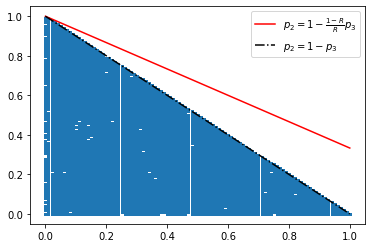

In [110]:
x = np.linspace(0, 1, 100).round(2)

y1 = 1 - ((1 -  0.6) / 0.6) * x
y2 = 1 - x

plt.plot(x, y1, '-r', label=r'$p_2 = 1 - \frac{1 - R}{R} p_3$')

plt.plot(x, y2, linestyle="-.", color='black', label='$p_2 = 1 - p_3$')

plt.scatter(eq_df['p3'], eq_df['p2'], s=3);

plt.legend();

### No equilibria

In [32]:
no_eq_players_ID = per_player[per_player == False].index

In [33]:
len(no_eq_players_ID)

9974898

In [36]:
sets = []
for ID in tqdm.tqdm_notebook(no_eq_players_ID):
    set_ = set(df[(df['ID'] == ID) & (df['condition'] == False)]['label'].values)
    
    sets.append(set_)

In [277]:
len(sets)

99742

In [278]:
flat_list = [item for sublist in sets for item in sublist]

In [279]:
from collections import Counter

In [283]:
max(Counter(flat_list).values())

99497

In [284]:
Counter(flat_list)

Counter({'N6': 49503,
         'N3': 73688,
         'N5': 74525,
         'N7': 49622,
         'N0': 99497,
         'N12': 91998,
         'N4': 99465,
         'N8': 91998,
         'N2': 97366,
         'N1': 88267,
         'N9': 141,
         'N10': 2})

In [249]:
set.intersection(*sets)

set()

In [285]:
index = [i for i, s in enumerate(sets) if 'N0' not in list(s)]
len(index)

245

In [286]:
other_sets = [sets[i] for i in index]

In [287]:
set.intersection(*other_sets)

{'N7'}

### Memory-one Payoffs

In [43]:
import sympy as sym

In [52]:
import os

In [53]:
os.chdir("../src/")

In [54]:
from importlib.machinery import SourceFileLoader

equilibria = SourceFileLoader("equilibria", "equilibria.py").load_module()

from equilibria import *

In [55]:
p1, p2, p3, p4 = sym.symbols("p1, p2, p3, p4")
q1, q2, q3, q4 = sym.symbols("q1, q2, q3, q4")

In [56]:
def M_symbolically(player, opponent):
    """
    Returns a Markov transition matrix for a game of memory one strategies.
    """
    return sym.Matrix(
        [
            [
                player[0] * opponent[0],
                player[0] * (1 - opponent[0]),
                (1 - player[0]) * opponent[0],
                (1 - player[0]) * (1 - opponent[0]),
            ],
            [
                player[1] * opponent[2],
                player[1] * (1 - opponent[2]),
                (1 - player[1]) * opponent[2],
                (1 - player[1]) * (1 - opponent[2]),
            ],
            [
                player[2] * opponent[1],
                player[2] * (1 - opponent[1]),
                (1 - player[2]) * opponent[1],
                (1 - player[2]) * (1 - opponent[1]),
            ],
            [
                player[3] * opponent[3],
                player[3] * (1 - opponent[3]),
                (1 - player[3]) * opponent[3],
                (1 - player[3]) * (1 - opponent[3]),
            ],
        ]
    )


In [57]:
M = M_symbolically([p1, p2, p3, p4], [q1, q2, q3, q4])
M

Matrix([
[p1*q1, p1*(1 - q1), q1*(1 - p1), (1 - p1)*(1 - q1)],
[p2*q3, p2*(1 - q3), q3*(1 - p2), (1 - p2)*(1 - q3)],
[p3*q2, p3*(1 - q2), q2*(1 - p3), (1 - p3)*(1 - q2)],
[p4*q4, p4*(1 - q4), q4*(1 - p4), (1 - p4)*(1 - q4)]])

In [49]:
ss = invariant_distribution_analytically(M)

In [59]:
Sx = payoffs(0.6, 0.1, dim=1)
Sy = coplayer_payoffs(0.6, 0.1, dim=1)

**Against ALLD**

In [73]:
expr = (ss.subs({q1:0, q2:0, q3:0, q4:0}) @ Sx)[0].factor()

In [74]:
expr2 = (ss.subs({q1:0, q2:0, q3:0, q4:0}) @ Sy)[0].simplify()

In [77]:
(expr - expr2).simplify()

1.0*p4/(p2 - p4 - 1)

**Against (0, 1, 1, 1)**

In [78]:
expr = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sx)[0].factor()

In [79]:
expr2 = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sy)[0].simplify()

In [87]:
(expr - expr2).subs({p1: 1}).simplify()

1.0*(p2 + p3 - 1)/(1.0*p2 - 2.0*p3 - 1.0)

**General case**

In [88]:
R, P = sym.symbols("R, P")

In [89]:
Sx = payoffs(R, P, dim=1)
Sy = coplayer_payoffs(R, P, dim=1)

In [90]:
expr = (ss.subs({q1:0, q2:0, q3:0, q4:0}) @ Sx)[0].factor()

In [91]:
expr2 = (ss.subs({q1:0, q2:0, q3:0, q4:0}) @ Sy)[0].simplify()

In [92]:
(expr - expr2).simplify()

p4/(p2 - p4 - 1)

In [94]:
expr = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sx)[0].factor()

In [95]:
expr2 = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sy)[0].simplify()

In [96]:
(expr - expr2).subs({p1: 1}).simplify()

(p2 + p3 - 1)/(p2 - 2*p3 - 1)